In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint, adfuller
from sklearn.preprocessing import StandardScaler
from arch.unitroot.cointegration import engle_granger

%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
# def fetch_data(tickers_list,
#                tickers_desc=None,
#                start_date = '2021-10-01', 
#                end_date = '2023-10-01', 
#                resample_weekly_data=False,
#                plot_graphs=True):
    
#     data = yf.download(tickers_list, start_date, end_date)['Adj Close']
    
#     if resample_weekly_data:
#         data = data.resample("W-FRI").last()
        
#     if plot_graphs: 
#         fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
#         axes[0].plot(data[tickers_list[0]])
#         axes[0].set_title(tickers_desc[0])
#         axes[0].tick_params('x', labelrotation=45)
        
#         axes[1].plot(data[tickers_list[1]])
#         axes[1].set_title(tickers_desc[1])
#         axes[1].tick_params('x', labelrotation=45)
#         plt.show()
            
#         # Standardising the variables only for plotting
#         scaler = StandardScaler().fit(data)
#         scaled_data = scaler.transform(data)
#         scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
#         scaled_data.plot(figsize=(5, 3))
#         plt.title("Standardized Data")
#         plt.show()
    
#     return data
            

In [2]:
def fetch_data(tickers_list,
               tickers_desc=None,
               start_date = '2021-10-01', 
               end_date = '2023-10-01', 
               resample_weekly_data=False,
               plot_graphs=True):
    
    data = yf.download(tickers_list, start_date, end_date)['Adj Close']
    
    if resample_weekly_data:
        data = data.resample("W-FRI").last()
        
    if plot_graphs: # Working for pairs for now. Not for more than 2 tickers 
        n_rows = np.ceil(data.shape[1]/2).astype(int)
        fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(10, 3))

        for idx, (ticker, ticker_desc) in enumerate(zip(tickers_list, tickers_desc)):
            
            if ticker_desc is None: ticker_desc = ticker
            axes[idx].plot(data[ticker])
            axes[idx].set_title(ticker_desc)
            axes[idx].tick_params('x', labelrotation=45)

        plt.show()
            
        # Standardising the variables only for plotting
        scaler = StandardScaler().fit(data)
        scaled_data = scaler.transform(data)
        scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
        scaled_data.plot(figsize=(5, 3))
        plt.title("Standardized Data")
        plt.show()
    
    return data
            

In [4]:
def adf_tval(X,Y, plot_residuals=True):
    # Fit an LR model with constant(intercept)
    X_train = sm.add_constant(X)
    model = sm.OLS(Y,X_train).fit()
    
    # Get the model residuals
    residuals = model.resid
    
    if plot_residuals:
        # Plot the model residuals
        pd.Series(residuals).plot()
        plt.show()
    
    # Perform a unit root test (Dickey-Fuller test) on the residuals without constant
    X_new = residuals[:-1].copy().reshape(-1,1)
    Y_new = residuals[1:] - residuals[:-1]
    adf_model = sm.OLS(Y_new,X_new).fit()
    
    # Return the t-stat
    return adf_model.tvalues[0]

In [5]:
def plot_cumulative_returns(data, legends_desc= None, return_cumulative_data=False):
    
    cumulative_returns = (data.pct_change()+1).cumprod()
    cumulative_returns.plot(figsize=(8, 4))

    # Print the legends
    if legends_desc is None:
        plt.legend()
    else:
        plt.legend(legends_desc)

    # Define the label for the title of the figure
    plt.title("Returns", fontsize=16)

    # Define the labels for x-axis and y-axis
    plt.ylabel('Cumulative Returns', fontsize=14)
    plt.xlabel('Year', fontsize=14)

    plt.show()
    
    if return_cumulative_data:
        return cumulative_returns

### Example 1

[*********************100%%**********************]  2 of 2 completed


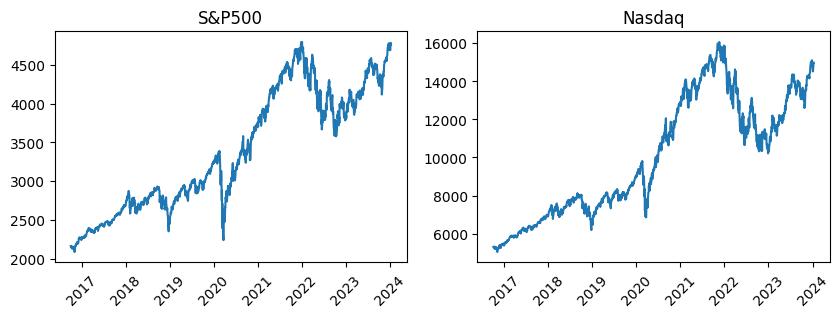

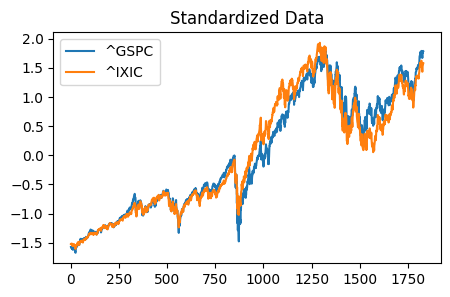

In [11]:
tickers_list = ['^GSPC', '^IXIC']
tickers_desc = ['S&P500', 'Nasdaq']
y_stock, x_stock = tickers_list
start_date = '2016-10-01'
end_date = '2024-01-12'
data = fetch_data(tickers_list, tickers_desc, start_date, end_date, resample_weekly_data=False, plot_graphs=True)

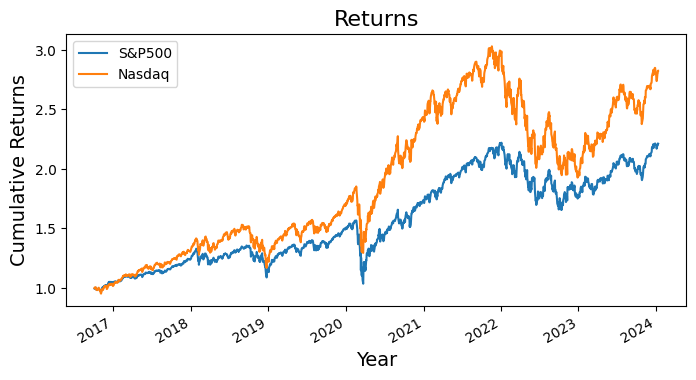

In [12]:
plot_cumulative_returns(data, legends_desc=tickers_desc)

In [13]:
y = data[y_stock].values
x = data[x_stock].values
t_statistic, p_val, critical_p_val = coint(y,x)
print(t_statistic, p_val)

-1.8114046724263209 0.6241660713173137


### Example 2

[*********************100%%**********************]  2 of 2 completed


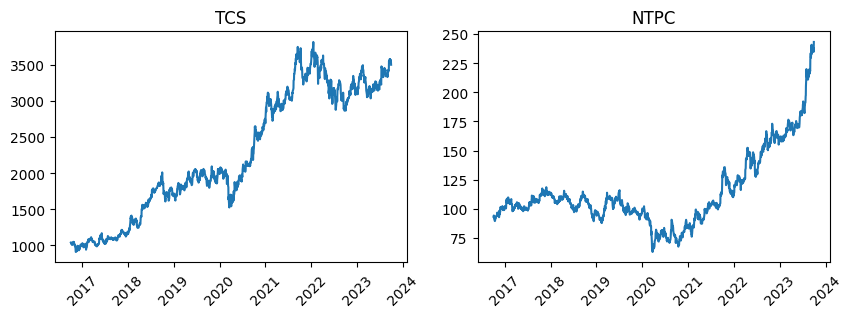

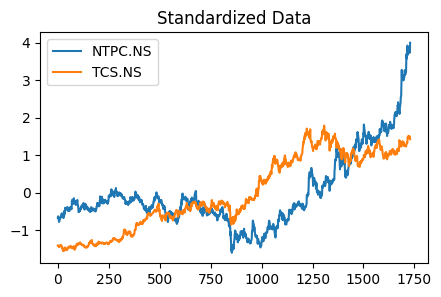

In [14]:
tickers_list = ['TCS.NS', 'NTPC.NS']
tickers_desc = ['TCS', 'NTPC']
y_stock, x_stock = tickers_list
start_date = '2016-10-01'
end_date = '2023-10-01'
data = fetch_data(tickers_list, tickers_desc, start_date, end_date, resample_weekly_data=False, plot_graphs=True)

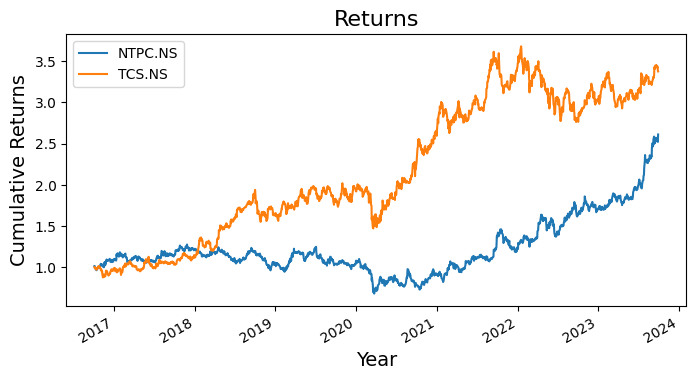

In [15]:
plot_cumulative_returns(data)

In [16]:
y = data[y_stock].values
x = data[x_stock].values
t_statistic, p_val, critical_p_val = coint(y,x)
print(f' t statistic: {np.round(t_statistic, 2)} \n p value: {np.round(p_val,2)} \n critical p values [1%, 5%, 10%]: {critical_p_val}')

 t statistic: -1.33 
 p value: 0.82 
 critical p values [1%, 5%, 10%]: [-3.90278545 -3.33966617 -3.04690389]


### Example 3

[*********************100%%**********************]  2 of 2 completed


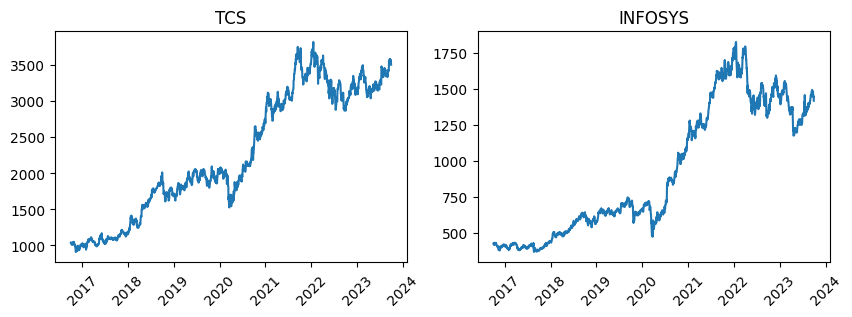

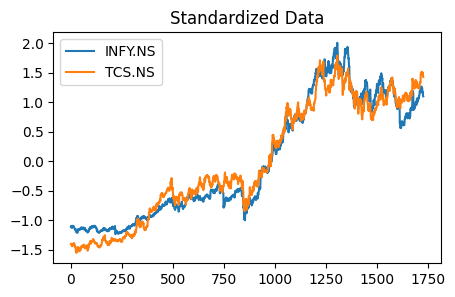

In [17]:
tickers_list = ['TCS.NS', 'INFY.NS']
tickers_desc = ['TCS', 'INFOSYS']
y_stock, x_stock = tickers_list
start_date = '2016-10-01'
end_date = '2023-10-01'
data = fetch_data(tickers_list, tickers_desc, start_date, end_date, resample_weekly_data=False, plot_graphs=True)

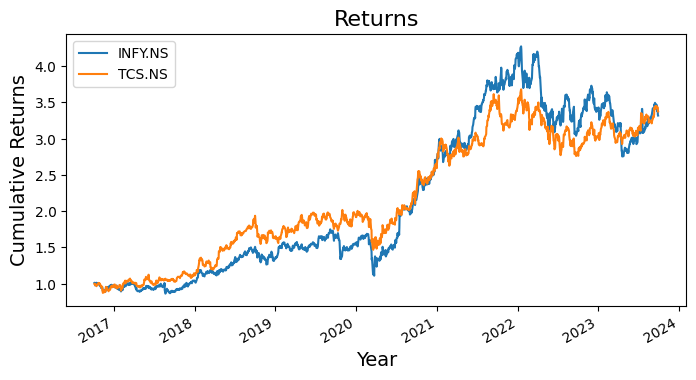

In [18]:
cumulative_returns = plot_cumulative_returns(data, return_cumulative_data=True)

In [19]:
cumulative_returns

,INFY.NS,TCS.NS
Date,,
2016-10-03,NaN,NaN
2016-10-04,1.010693,0.997284
2016-10-05,1.003275,0.989489
2016-10-06,0.989693,0.990484
2016-10-07,0.975388,0.981797
...,...,...
2023-09-25,3.408211,3.421960
2023-09-26,3.376999,3.430139
2023-09-27,3.391680,3.433583


In [67]:
data

,INFY.NS,TCS.NS
Date,,
2016-10-03,427.002075,1042.653564
2016-10-04,431.567932,1039.821289
2016-10-05,428.400665,1031.693970
2016-10-06,422.600922,1032.731445
2016-10-07,416.492554,1023.673706
...,...,...
2023-09-25,1455.313110,3567.917969
2023-09-26,1441.985596,3576.445801
2023-09-27,1448.254395,3580.036621


In [20]:
y = data[y_stock].values
x = data[x_stock].values
t_statistic, p_val, critical_p_val = coint(y,x)
print(f' t statistic: {np.round(t_statistic, 2)} \n p value: {np.round(p_val,2)} \n critical p values [1%, 5%, 10%]: {critical_p_val}')

 t statistic: -3.22 
 p value: 0.07 
 critical p values [1%, 5%, 10%]: [-3.90278545 -3.33966617 -3.04690389]


In [21]:
y = data[y_stock].values
x = data[x_stock].values
t_statistic, p_val, critical_p_val = coint(y,x, trend='ct')
print(f' t statistic: {np.round(t_statistic, 3)} \n p value: {np.round(p_val,3)} \n critical p values [1%, 5%, 10%]: {critical_p_val}')

 t statistic: -4.625 
 p value: 0.004 
 critical p values [1%, 5%, 10%]: [-4.3365612  -3.78607468 -3.50040824]


### Inspecting the Cointegration function

In [22]:
def adf_tval(X,Y, plot_residuals=True):
    # Fit an LR model with constant(intercept)
    X_train = sm.add_constant(X)
    model = sm.OLS(Y,X_train).fit()
    
    # Get the model residuals
    residuals = model.resid
    
    if plot_residuals:
        # Plot the model residuals
        pd.Series(residuals).plot()
        plt.show()
    
    # Perform a unit root test (Dickey-Fuller test) on the residuals without constant
    X_new = residuals[:-1].copy().reshape(-1,1)
    Y_new = residuals[1:] - residuals[:-1]
    adf_model = sm.OLS(Y_new,X_new).fit()
    
    # Return the t-stat
    return adf_model.tvalues[0]

In [23]:
tickers_list = ['TCS.NS', 'INFY.NS']
tickers_desc = ['TCS', 'INFOSYS']
y_stock, x_stock = tickers_list
start_date = '2016-10-01'
end_date = '2023-10-01'
data = fetch_data(tickers_list, tickers_desc, start_date, end_date, resample_weekly_data=False, plot_graphs=False)

[*********************100%%**********************]  2 of 2 completed


In [24]:
Y = data['TCS.NS'].values
X = data['INFY.NS'].values

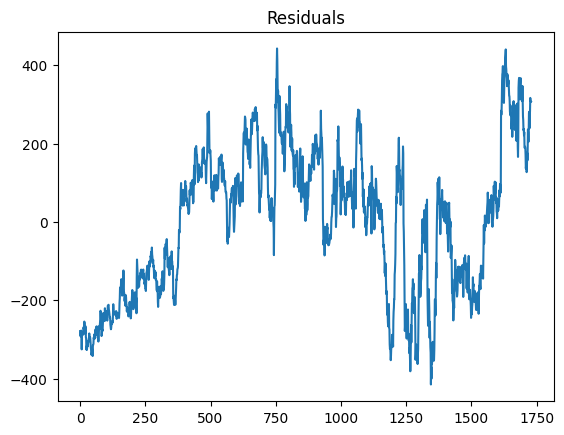

In [25]:
# Fit an LR model with constant(intercept)
X_train = sm.add_constant(X)
model = sm.OLS(Y,X_train).fit()

# Get the model residuals
residuals = model.resid

# Plot the model residuals
pd.Series(residuals).plot()
plt.title('Residuals')
plt.show()

In [26]:
X_new = residuals[:-1].copy().reshape(-1,1)
Y_new = residuals[1:] - residuals[:-1]

<Axes: >

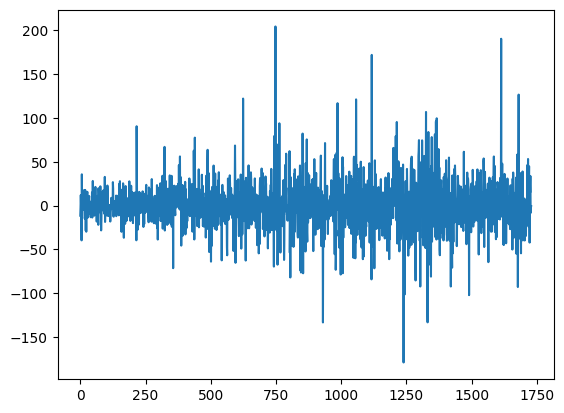

In [27]:
pd.Series(Y_new).plot()

In [28]:
adf_model = sm.OLS(Y_new,X_new).fit()
print(f't-statistic: {np.round(adf_model.tvalues[0], 2)}, p-value: {np.round(adf_model.pvalues[0], 3)}')

t-statistic: -3.22, p-value: 0.001


In [29]:
np.round(adf_model.pvalues, 3)

array([0.001])

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
adfuller(residuals, regression='c', autolag='AIC', store=False, regresults=False)

(-3.222305022838042,
 0.018729339922186936,
 0,
 1729,
 {'1%': -3.434137758862471,
  '5%': -2.8632130839838936,
  '10%': -2.567660702509265},
 16269.037545793472)